### Deep Learning Assignment (Bee or Wasp)

In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

%matplotlib inline

In [2]:
### get the data

# import wget

# data =  "https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip"
# data = wget.download(data)

In [3]:
# import zipfile

# z = zipfile.ZipFile('data.zip')
# z.extractall()

In [4]:
# import OS module
import os

# unzipped folder
path = "./data/train/bee"

# to store files in a list
list = []

# dirs=directories
for (root, dirs, file) in os.walk(path):
	for f in file:
		if '.jpg' or '.png' in f:
			list.append(f)

list[0]

'20997149292_3b5fd09795_m.jpg'

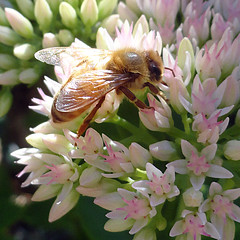

In [5]:
path = "./data/train/bee"
name = "20997149292_3b5fd09795_m.jpg"
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:

# base_model = Xception(
#         weights='imagenet',
#         include_top=False,
#         input_shape=(150, 150, 3)
#     )

# #prevent retraining convolutionary layer part
# base_model.trainable = False

## Question 1

#### Ans: `Binary Cross Entropy for binary classification models`

## Question 2

In [9]:
input_shape = (150, 150, 3)

inputs = tf.keras.Input(shape=(150, 150, 3))


# add convolution layers with 32 filters, kernel size = (3,3), and activation ='relu'
vectors = keras.layers.Conv2D(32, (3,3), activation="relu")(inputs)

# reduce the pool size
vectors = keras.layers.MaxPooling2D(pool_size=(2,2))(vectors)

# flatten the layer
vectors = keras.layers.Flatten()(vectors)

# add Dense layer
vectors = keras.layers.Dense(64, activation="relu")(vectors)

# output with sigmoid function to tansform into range of [0, 1]
outputs = keras.layers.Dense(1, activation="sigmoid")(vectors)

model = keras.Model(inputs, outputs)

# Define the SGD optimizer
sgd = SGD(learning_rate=0.002, momentum=0.8)

# Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

#### Ans: `Parameters for convolutionary layers == 896`

## Question 3

In [10]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_gen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary', #binary class_mode parameter
        shuffle=True) 


Found 3677 images belonging to 2 classes.


In [12]:
validation_generator = test_gen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary', #binary class_mode parameter
        shuffle=True) 

Found 918 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
184/184 [==============================] - 24s 128ms/step - loss: 0.6614 - accuracy: 0.5983 - val_loss: 0.6017 - val_accuracy: 0.6830
Epoch 2/10
184/184 [==============================] - 27s 148ms/step - loss: 0.6006 - accuracy: 0.6813 - val_loss: 0.5634 - val_accuracy: 0.7168
Epoch 3/10
184/184 [==============================] - 28s 153ms/step - loss: 0.5461 - accuracy: 0.7316 - val_loss: 0.5360 - val_accuracy: 0.7407
Epoch 4/10
184/184 [==============================] - 28s 152ms/step - loss: 0.5126 - accuracy: 0.7609 - val_loss: 0.5207 - val_accuracy: 0.7462
Epoch 5/10
184/184 [==============================] - 28s 153ms/step - loss: 0.4865 - accuracy: 0.7699 - val_loss: 0.5148 - val_accuracy: 0.7647
Epoch 6/10
184/184 [==============================] - 28s 153ms/step - loss: 0.4663 - accuracy: 0.7898 - val_loss: 0.5113 - val_accuracy: 0.7582
Epoch 7/10
184/184 [==============================] - 28s 153ms/step - loss: 0.4464 - accuracy: 0.7987 - val_loss: 0.4974 - val_ac

In [14]:
med_training_accuracy = np.median(history.history['accuracy'])
med_training_accuracy

0.7798477113246918

#### Ans: Median of the training accuarcy is  `Approximately == 0.80`

## Question 4

In [15]:
std_training_accuracy = np.std(history.history['loss'])
std_training_accuracy

0.08719018575063797

#### Ans: Standard Deviation of training loss is `approximately == 0.091`

## Question 5

In [16]:
# adding data augmentations
train_gen = ImageDataGenerator(rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest', rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_gen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary', #binary class_mode parameter
        shuffle=True) 

Found 3677 images belonging to 2 classes.


In [18]:
validation_generator = test_gen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary', #binary class_mode parameter
        shuffle=True) 

Found 918 images belonging to 2 classes.


In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
184/184 [==============================] - 45s 246ms/step - loss: 0.4938 - accuracy: 0.7658 - val_loss: 0.4757 - val_accuracy: 0.7691
Epoch 2/10
184/184 [==============================] - 43s 232ms/step - loss: 0.4971 - accuracy: 0.7607 - val_loss: 0.4802 - val_accuracy: 0.7898
Epoch 3/10
184/184 [==============================] - 41s 220ms/step - loss: 0.4854 - accuracy: 0.7686 - val_loss: 0.4679 - val_accuracy: 0.7810
Epoch 4/10
184/184 [==============================] - 42s 227ms/step - loss: 0.4705 - accuracy: 0.7835 - val_loss: 0.4643 - val_accuracy: 0.7734
Epoch 5/10
184/184 [==============================] - 40s 217ms/step - loss: 0.4783 - accuracy: 0.7759 - val_loss: 0.4598 - val_accuracy: 0.7919
Epoch 6/10
184/184 [==============================] - 40s 218ms/step - loss: 0.4727 - accuracy: 0.7830 - val_loss: 0.4617 - val_accuracy: 0.7767
Epoch 7/10
184/184 [==============================] - 40s 215ms/step - loss: 0.4589 - accuracy: 0.7925 - val_loss: 0.4985 - val_ac

In [20]:
mean_val_loss = np.mean(history.history['val_loss'])
mean_val_loss

0.47768561244010926

#### Ans 5: Mean of Validation loss is `approximately 0.48`

### Question 6

In [21]:
val_acc = history.history['val_accuracy'][5:]
avg_val_acc = np.mean(val_acc)
avg_val_acc 

0.7764706015586853

#### Ans 6: Average Validation Accuracy is for 6-10 epochs is `approximately 0.78`